In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import boto3
import pandas as pd

In [3]:
client = boto3.client('s3')

In [4]:
jhu_csse_covid_19_timeseries = client.get_object(Bucket='covid19-lake', Key='enigma-jhu-timeseries/csv/jhu_csse_covid_19_timeseries_merged.csv')

In [5]:
df = pd.read_csv(jhu_csse_covid_19_timeseries['Body'])

In [6]:
# get unique values of a column 'country_region'
#df.country_region.unique()

# filter all data sets for 'Germany'
germany_only = df[(df.country_region == "Germany")]

In [7]:
# reduce the number of columns
germany_only.reindex(['date','country_region','confirmed','deaths','recovered'], axis=1)
#df.drop(['latitude','longitude'],axis=1,inplace=True)

,date,country_region,confirmed,deaths,recovered
420127,2020-01-22,Germany,0,0,0.0
420364,2020-01-23,Germany,0,0,0.0
420601,2020-01-24,Germany,0,0,0.0
420838,2020-01-25,Germany,0,0,0.0
421075,2020-01-26,Germany,0,0,0.0
...,...,...,...,...,...
449515,2020-05-05,Germany,167007,6993,135100.0
449752,2020-05-06,Germany,168162,7275,139900.0
449989,2020-05-07,Germany,169430,7392,141700.0
450226,2020-05-08,Germany,170588,7510,141700.0


In [33]:
date = germany_only.date
confirmed = germany_only.confirmed
recovered = germany_only.recovered

actual = germany_only.confirmed - germany_only.recovered

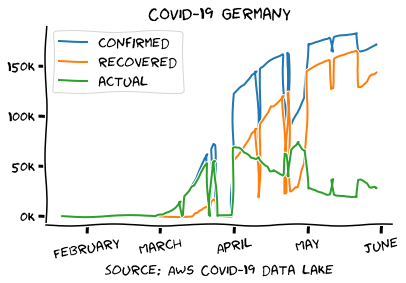

In [35]:
plt.xkcd()

def kilos(x, pos):
    'The two args are the value and tick position'
    return '%1.0fk' % (x*1e-3)
formatter = FuncFormatter(kilos)

fig = plt.figure()

ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xticks([])

ax.yaxis.set_major_formatter(formatter)

plt.plot(date, confirmed, label = 'confirmed')
plt.plot(date, recovered, label = 'recovered')
plt.plot(date, actual, label = 'actual')
plt.legend()
plt.xlabel('source: AWS COVID-19 data lake')

xticks([10, 40, 70, 100, 130], ['February', 'March', 'April', 'May', 'June'],rotation=10)
#plt.scatter(date, confirmed)

plt.title('COVID-19 Germany')

plt.savefig('/home/jovyan/work/covid19/covid_19_germany.svg')
plt.savefig('/home/jovyan/work/covid19/covid_19_germany.png')
